In [3]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

#  Итоговая работа

## Задание 1

### Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
from sklearn.metrics.pairwise import pairwise_distances

**a)**

In [6]:
# D - матрица расстояний, такая, что D {i, j} - расстояние между i-м и j-м векторами матрицы X (raitings).

D = pairwise_distances(raitings, metric='cosine')
D

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [7]:
result = []
D_list = D.tolist()

for index, user in enumerate(D_list):
    min_value = min(user)
    for ind, value in enumerate(user):
        if min_value == value:
            min_index = ind 
        
    result.append((index, min_index))

result

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

**б)**

Используем метод главных компонент (PCA)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
raitings_pca = pca.fit_transform(raitings)

In [9]:
raitings_pca

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2

### Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [10]:
import sympy as sym

In [11]:
x = sym.Symbol('x')

In [12]:
func = sym.tan(sym.sin(x) + sym.cos(2*x + 3))**2
func

tan(sin(x) + cos(2*x + 3))**2

In [13]:
diff_func = sym.diff(sym.tan(sym.sin(x) + sym.cos(2*x + 3))**2)
diff_func

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [14]:
# Вычисление значения первой производной функции в точке: х = 1

print(diff_func.subs(x, 1)) 
diff_np = 2*(1 + np.tan(np.cos(5) + np.sin(1))**2)*(np.cos(1) - 2 * np.sin(5)) * np.tan(np.cos(5) + np.sin(1))

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))


In [15]:
print(f'Значение первой производной функции в точке х = 1: =>   {diff_np:.2f}')

Значение первой производной функции в точке х = 1: =>   55.39


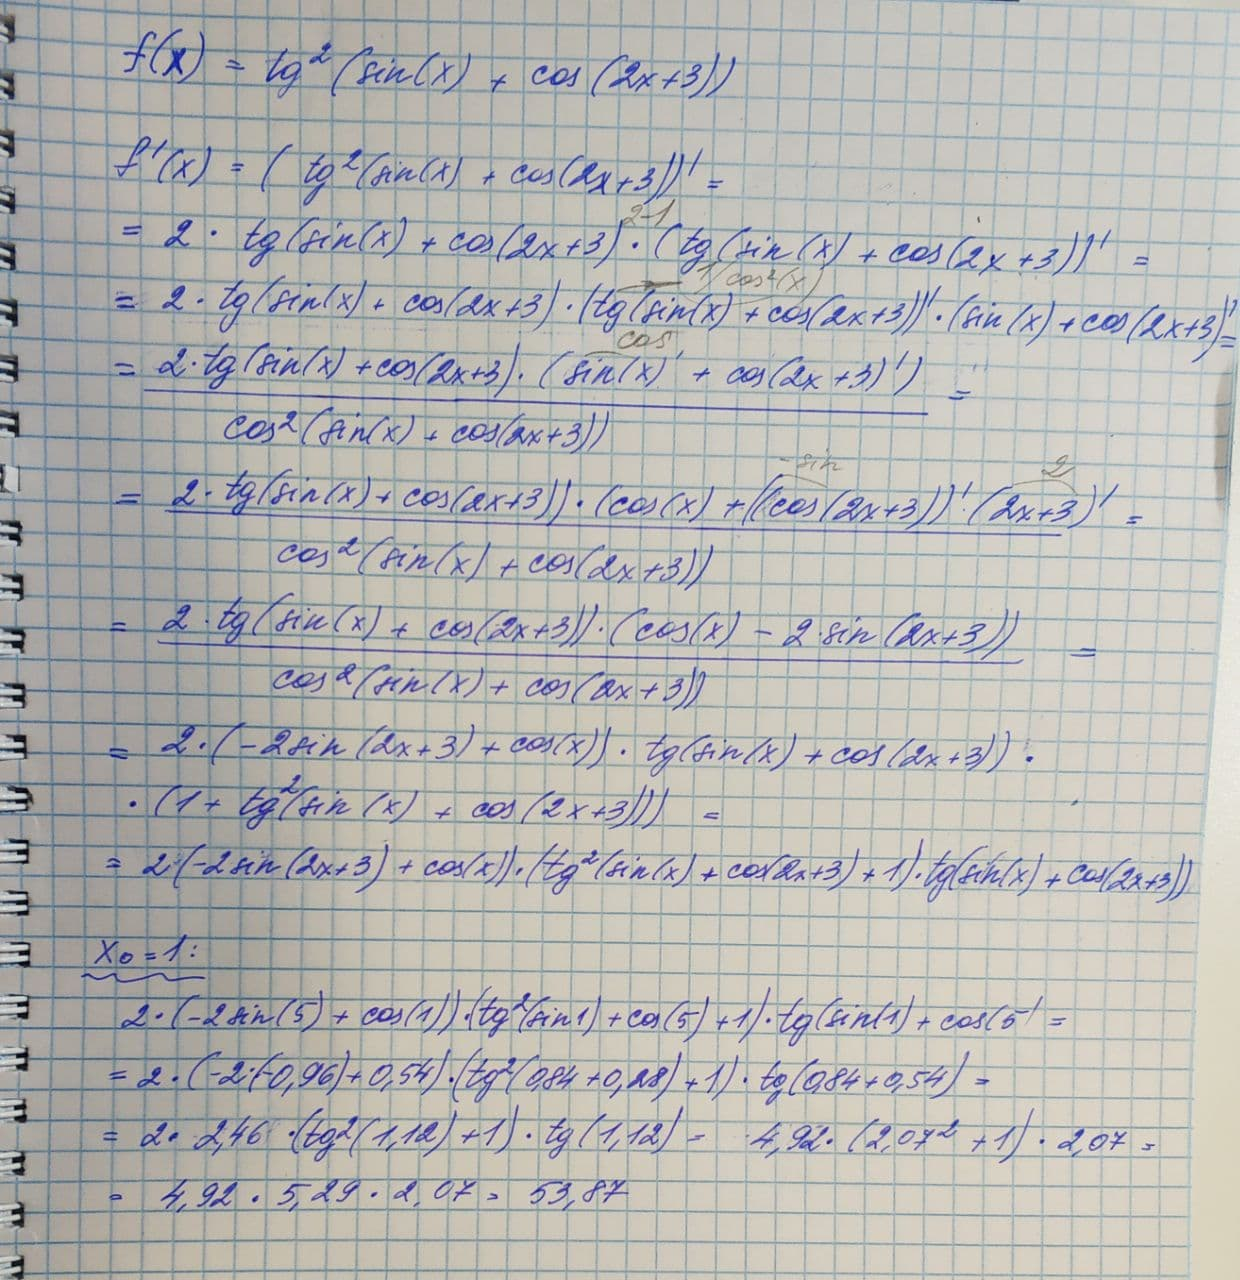

## Задание 3


### Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [16]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [17]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])
x.shape

(20,)

In [18]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

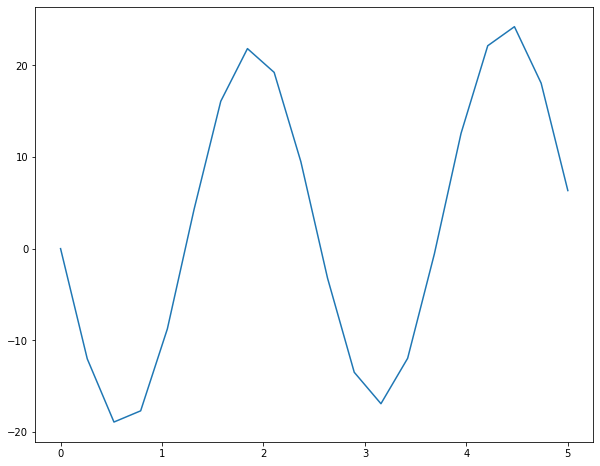

In [19]:
plt.figure(figsize=(10,8))
plt.plot(x, fx)
plt.show()

In [20]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [21]:
from scipy.optimize import minimize

x0 = np.array([0.,0.])

In [22]:
res = minimize(error, [3,  -3], method='nelder-mead')

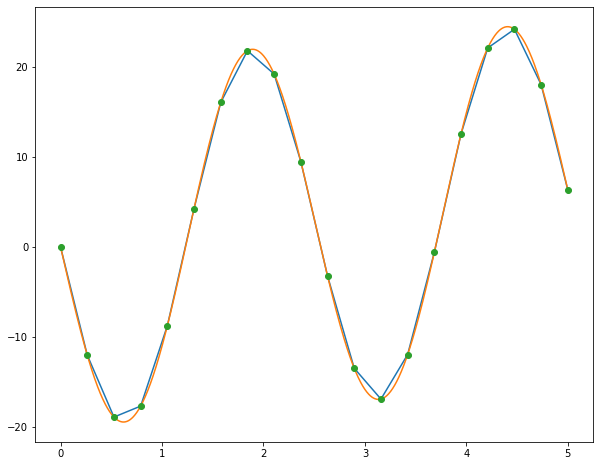

In [23]:
x1 = np.linspace(0, 5, 1000)

plt.figure(figsize=(10, 8))
plt.plot(x, fx)
plt.plot(x1, f(x1, res.x[0], res.x[1]))
plt.plot(x, fx, 'o')
plt.show()

## Задание 4

### Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [22]:
discrete_random_variable = np.random.randint(0, 20, size = [1000,50])
discrete_random_variable

array([[ 3,  5,  2, ..., 12,  8,  6],
       [12,  8, 13, ...,  4, 16,  2],
       [11, 11, 12, ..., 12, 10, 19],
       ...,
       [ 7, 14,  8, ..., 16,  9, 11],
       [ 9,  3,  5, ...,  7,  2,  6],
       [10, 19, 17, ...,  7, 18,  8]])

In [23]:
discrete_random_variable.shape

(1000, 50)

In [24]:
sample_mean = np.mean(discrete_random_variable, axis=1)
sample_mean

array([ 8.72,  9.1 ,  9.6 ,  8.92,  9.88, 11.14,  8.98,  8.6 ,  9.36,
        9.34,  8.88,  7.76,  8.92,  8.04,  9.62,  8.5 , 10.32,  9.04,
       10.16,  9.82,  8.14,  9.92,  9.92, 10.22,  9.62,  7.94, 10.26,
        9.08,  9.38,  9.4 , 10.98,  9.08, 10.2 , 10.44,  9.28,  9.86,
        9.36,  9.34,  8.98,  8.78,  9.1 ,  8.04,  9.4 ,  9.9 ,  7.92,
        8.1 , 10.54,  9.16,  8.52,  9.12, 10.14,  9.76,  9.16,  9.32,
        9.4 ,  8.86, 10.26,  7.52,  9.64,  9.44,  9.3 ,  9.22, 10.64,
        9.7 ,  9.34,  9.72,  8.34, 11.7 ,  9.38, 10.94,  8.8 ,  9.46,
       10.34,  8.92,  8.5 , 10.3 ,  9.72,  8.18,  9.92,  9.74,  9.52,
        7.42,  9.26,  9.82,  7.94,  9.68, 10.1 ,  9.6 ,  9.52,  9.5 ,
        9.16,  9.8 , 10.26,  8.64,  9.84, 10.66,  9.4 , 10.56, 10.52,
       10.38,  9.72,  8.64,  9.44,  8.9 ,  8.52,  8.4 ,  9.28,  9.2 ,
       10.06,  8.94,  8.34,  8.54,  9.38, 10.46,  8.96, 10.48,  9.04,
        7.34,  9.3 , 10.1 ,  9.84,  9.96, 10.6 ,  9.42,  8.48, 10.6 ,
        9.4 ,  9.3 ,

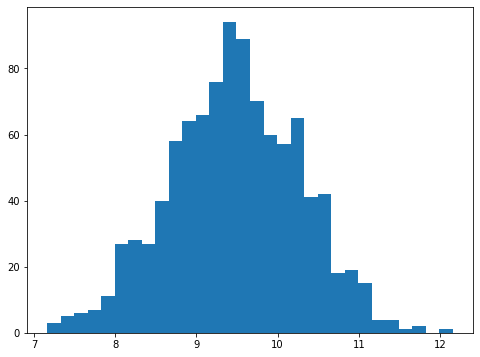

In [25]:
plt.figure(figsize=(8,6))
plt.hist(sample_mean, bins=30)
plt.show()

## Задание 5

### Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [26]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [27]:
eigenvalues, eigenvectors = np.linalg.eig(m)

print(f'Собственные значения матрицы: ', eigenvalues)

Собственные значения матрицы:  [ 3. -1.]


In [28]:
print(f'Собственные вектора матрицы: ','\n', eigenvectors)

Собственные вектора матрицы:  
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


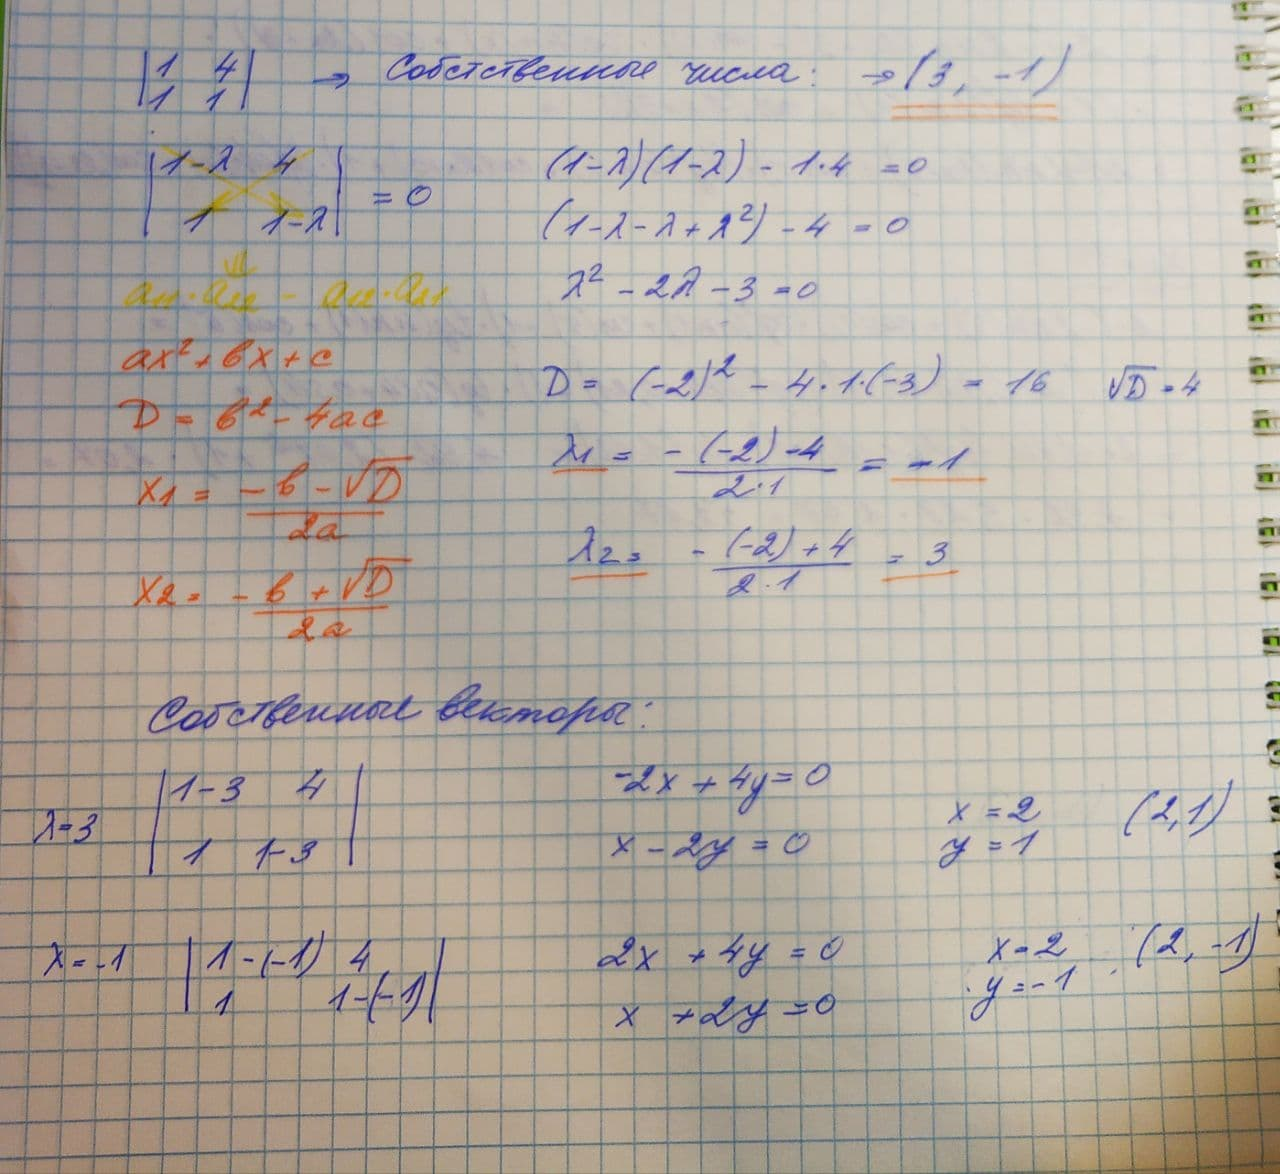